# Rubiks Visualizer

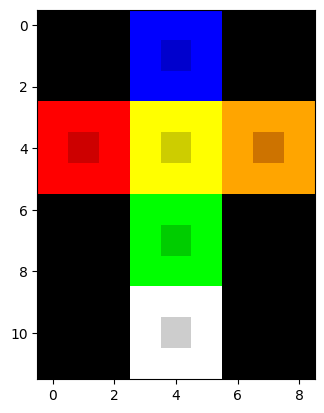

In [145]:
viz = np.zeros((3*4, 3*3, 3))

# Draw fixed pieces.
fixed_offset = 50
viz[1][4] = [0, 0, 255-fixed_offset]
viz[4][1] = [255-fixed_offset, 0, 0]
viz[4][4] = [255-fixed_offset, 255-fixed_offset, 0]
viz[4][7] = [255-fixed_offset, 165-fixed_offset, 0]
viz[7][4] = [0, 255-fixed_offset, 0]
viz[10][4] = [255-fixed_offset, 255-fixed_offset, 255-fixed_offset]

colors = {
  "yellow": [255, 255, 0],
  "green": [0, 255, 00],
  "blue": [0, 0, 255],
  "red": [255, 0, 0],
  "orange": [255, 165, 0],
  "white": [255, 255, 255]
}

# Create (m)ap between piece and visualization.
m = {
    ("U", 0): (3, 3),
    ("U", 1): (3, 4),
    ("U", 2): (3, 5),
    ("U", 3): (4, 5),
    ("U", 4): (5, 5),
    ("U", 5): (5, 4),
    ("U", 6): (5, 3),
    ("U", 7): (4, 3),

}

# Offset each side in relaton to side U.
for i in range(8):
  m[("B", i)] = m[("U", i)][0]-3, m[("U", i)][1]
  m[("L", i)] = m[("U", i)][0], m[("U", i)][1]-3
  m[("R", i)] = m[("U", i)][0], m[("U", i)][1]+3
  m[("F", i)] = m[("U", i)][0]+3, m[("U", i)][1]
  m[("D", i)] = m[("U", i)][0]+6, m[("U", i)][1]

# Assign default colors for test.
for i in range(8):
  viz[m[("U", i)]] = colors["yellow"]
  viz[m[("F", i)]] = colors["green"]
  viz[m[("B", i)]] = colors["blue"]
  viz[m[("L", i)]] = colors["red"]
  viz[m[("R", i)]] = colors["orange"]
  viz[m[("D", i)]] = colors["white"]

# Try to change this as a test.
#viz[m[("F", 0)]] = [255, 0, 255]

plot_images([viz.astype(np.uint8)])

In [137]:
# Define offsets between camera indeces and global indices for different cube orientations.
# For instance, if the cube is oriented with the yellow side up and blue side front
# the offset for all indices on side (U)pp will be: offsets_U[("yellow", "blue")].
offsets_U={("green","yellow"):4,("green","white"):0,("green","red"):2,("green","orange"):6,("yellow","green"):0,("yellow","blue"):4,("yellow","red"):2,("yellow","orange"):6,("blue","yellow"):0,("blue","white"):4,("blue","red"):2,("blue","orange"):6,("white","green"):4,("white","blue"):0,("white","red"):2,("white","orange"):6,("red","green"):0,("red","yellow"):6,("red","blue"):4,("red","white"):2,("orange","green"):0,("orange","yellow"):2,("orange","blue"):4,("orange","white"):6}
offsets_F={("yellow","green"):0,("white","green"):4,("red","green"):6,("orange","green"):2,("green","yellow"):4,("blue","yellow"):0,("red","yellow"):6,("orange","yellow"):2,("yellow","blue"):4,("white","blue"):0,("red","blue"):6,("orange","blue"):2,("green","white"):0,("blue","white"):4,("red","white"):6,("orange","white"):2,("green","red"):4,("yellow","red"):2,("blue","red"):0,("white","red"):6,("green","orange"):4,("yellow","orange"):6,("blue","orange"):0,("white","orange"):2}
offsets_L={("yellow","orange"):0,("orange","white"):2,("white","red"):4,("red","yellow"):6,("blue","orange"):0,("orange","green"):2,("green","red"):4,("red","blue"):6,("white","orange"):0,("orange","yellow"):2,("yellow","red"):4,("red","white"):6,("green","orange"):0,("orange","blue"):2,("blue","red"):4,("red","green"):6,("blue","yellow"):0,("yellow","green"):2,("green","white"):4,("white","blue"):6,("blue","white"):0,("white","green"):2,("green","yellow"):4,("yellow","blue"):6}

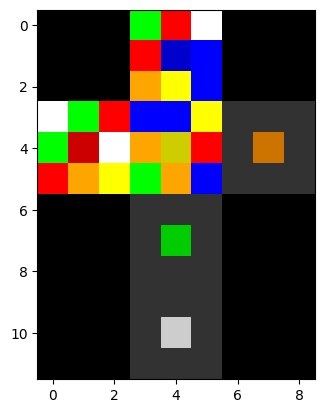

In [152]:
# Reset visualiation.
for side in ["U", "F", "B", "L", "R", "D"]:
  for i in range(8):
    viz[m[(side, i)]] = [50, 50, 50]

piece_colors = {}
for i, piece in enumerate(piece_predictions):
    piece_colors[piece] = color_predictions[i]
print(m)
print(color_names)

camera_piece_names = [
    ("U", 0), ("U", 1), ("U", 2), ("U", 3), ("U", 4), ("U", 5), ("U", 6), ("U", 7), ("U", 8),
    ("F", 0), ("F", 1), ("F", 2), ("F", 3), ("F", 4), ("F", 5), ("F", 6), ("F", 7), ("F", 8),
    ("L", 0), ("L", 1), ("L", 2), ("L", 3), ("L", 4), ("L", 5), ("L", 6), ("L", 7), ("L", 8)
]

fixed_color_to_side = ["F", "U", "B", "D", "L", "R"]

# Get orientation (the fixed pieces always has the same indices).
color_U, color_F, color_L = piece_colors[8], piece_colors[17], piece_colors[26]

def local_to_global(local):
  return (local + offset) % 8

for piece, color in piece_colors.items():
  camera_name = camera_piece_names[piece]

  if piece < 9:
    offset = offsets_U[(color_names[color_U], color_names[color_F])]
    side = fixed_color_to_side[color_U]
  elif piece < 18:
    offset = offsets_F[(color_names[color_U], color_names[color_F])]
    side = fixed_color_to_side[color_F]
  else:
    offset = offsets_L[(color_names[color_U], color_names[color_F])]
    side = fixed_color_to_side[color_L]

  viz[m[(side, local_to_global(camera_name[1]))]] = colors[color_names[color]]

plot_images([viz.astype(np.uint8)])
  

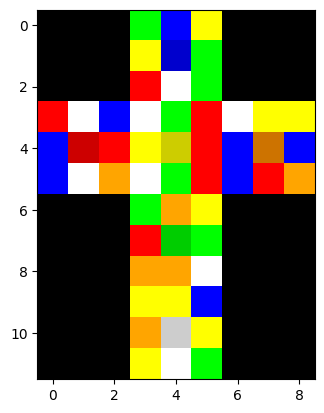

In [138]:
# Test with random photo.

# Reset visualiation.
for side in ["U", "F", "B", "L", "R", "D"]:
  for i in range(8):
    viz[m[(side, i)]] = [50, 50, 50]

def local_to_global(local):
  return (local + offset) % 8

# Below we are manually entering the values as they are seen by the camera.

# The side that is (U)pp for the camera.
# The following three blocks represents the first image.
offset = offsets_U[("green", "orange")]
viz[m[("F", local_to_global(0))]] = colors["orange"]
viz[m[("F", local_to_global(1))]] = colors["red"]
viz[m[("F", local_to_global(2))]] = colors["green"]
viz[m[("F", local_to_global(3))]] = colors["orange"]
viz[m[("F", local_to_global(4))]] = colors["yellow"]
viz[m[("F", local_to_global(5))]] = colors["green"]
viz[m[("F", local_to_global(6))]] = colors["white"]
viz[m[("F", local_to_global(7))]] = colors["orange"]

offset = offsets_L[("green", "orange")]
viz[m[("D", local_to_global(0))]] = colors["yellow"]
viz[m[("D", local_to_global(1))]] = colors["yellow"]
viz[m[("D", local_to_global(2))]] = colors["blue"]
viz[m[("D", local_to_global(3))]] = colors["yellow"]
viz[m[("D", local_to_global(4))]] = colors["green"]
viz[m[("D", local_to_global(5))]] = colors["white"]
viz[m[("D", local_to_global(6))]] = colors["yellow"]
viz[m[("D", local_to_global(7))]] = colors["orange"]

offset = offsets_F[("green", "orange")]
viz[m[("R", local_to_global(0))]] = colors["orange"]
viz[m[("R", local_to_global(1))]] = colors["red"]
viz[m[("R", local_to_global(2))]] = colors["blue"]
viz[m[("R", local_to_global(3))]] = colors["blue"]
viz[m[("R", local_to_global(4))]] = colors["white"]
viz[m[("R", local_to_global(5))]] = colors["yellow"]
viz[m[("R", local_to_global(6))]] = colors["yellow"]
viz[m[("R", local_to_global(7))]] = colors["blue"]

# The following three blocks represents the second image.
offset = offsets_U[("blue", "yellow")]
viz[m[("B", local_to_global(0))]] = colors["green"]
viz[m[("B", local_to_global(1))]] = colors["blue"]
viz[m[("B", local_to_global(2))]] = colors["yellow"]
viz[m[("B", local_to_global(3))]] = colors["green"]
viz[m[("B", local_to_global(4))]] = colors["green"]
viz[m[("B", local_to_global(5))]] = colors["white"]
viz[m[("B", local_to_global(6))]] = colors["red"]
viz[m[("B", local_to_global(7))]] = colors["yellow"]

offset = offsets_L[("blue", "yellow")]
viz[m[("L", local_to_global(0))]] = colors["red"]
viz[m[("L", local_to_global(1))]] = colors["white"]
viz[m[("L", local_to_global(2))]] = colors["blue"]
viz[m[("L", local_to_global(3))]] = colors["red"]
viz[m[("L", local_to_global(4))]] = colors["orange"]
viz[m[("L", local_to_global(5))]] = colors["white"]
viz[m[("L", local_to_global(6))]] = colors["blue"]
viz[m[("L", local_to_global(7))]] = colors["blue"]

offset = offsets_F[("blue", "yellow")]
viz[m[("U", local_to_global(0))]] = colors["white"]
viz[m[("U", local_to_global(1))]] = colors["green"]
viz[m[("U", local_to_global(2))]] = colors["red"]
viz[m[("U", local_to_global(3))]] = colors["red"]
viz[m[("U", local_to_global(4))]] = colors["red"]
viz[m[("U", local_to_global(5))]] = colors["green"]
viz[m[("U", local_to_global(6))]] = colors["white"]
viz[m[("U", local_to_global(7))]] = colors["yellow"]

plot_images([viz.astype(np.uint8)])